In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)
import random 
random.seed(31337)

In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[4]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'bursi.pos.gspan'

In [3]:
%%time
# induce a grammar and train an estimator
training_graphs = get_graphs(dataset_fname, size=200)

from graphlearn.graphlearn import GraphLearnSampler
from eden.graph import Vectorizer
sampler=GraphLearnSampler(radius_list=[0,1], thickness_list=[1,2],
                          min_cip_count=2, min_interface_count=2,
                          vectorizer=Vectorizer(3))
#take nu% of data as outlier
sampler.fit(training_graphs, nu=0.3, n_jobs=-1)

print('graph grammar stats:')
interface_counts, core_counts, cip_counts = sampler.grammar().size()
print('#interfaces: %d   #cores: %d   #core-interface-pairs: %d' % (interface_counts, core_counts, cip_counts))


Classifier:
SGDClassifier(alpha=0.000561967744838, average=False, class_weight=None,
       epsilon=0.1, eta0=0.416175843485, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=93, n_jobs=1,
       penalty='l1', power_t=0.370175010917, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

Predictive performance:
            accuracy: 1.000 +- 0.000
           precision: 1.000 +- 0.000
              recall: 1.000 +- 0.000
                  f1: 1.000 +- 0.000
   average_precision: 1.000 +- 0.000
             roc_auc: 1.000 +- 0.000
#interfaces: 155   #cores: 74   #core-interface-pairs: 626
graph grammar stats:
#interfaces: 155   #cores: 74   #core-interface-pairs: 626
CPU times: user 22.4 s, sys: 1.1 s, total: 23.5 s
Wall time: 42.1 s


In [4]:
%%time
# graph sampling
graphs = get_graphs(dataset_fname, size=100)
id_start=10
id_end=id_start+6
from itertools import islice
graphs = islice(graphs,id_start,id_end)

# sample
n_steps=100
n_samples=5

#graph= graphs.next()
#graphs = [graph]*12

from graphlearn.graphlearn import GraphLearnSampler
graphs = sampler.sample(graphs,
                        n_steps=n_steps, n_samples=n_samples,
                        target_orig_cip=True,
                        probabilistic_core_choice=False,
                        score_core_choice= False,
                        max_core_size_diff=-1,
                        max_cycle_size=7,
                        burnin=0,
                        omit_seed=True,
                        
                        improving_threshold=0.7, 
                        accept_static_penalty=0,
                        n_jobs=1,
                        select_cip_max_tries=200,
                        keep_duplicates=True)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 40.1 µs


preprocessing grammar
_sample_notes: None
accept_static_penalty: 0
batch_size: 10
    burnin: 0
complexity: 3
 estimator: CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.000561967744838, average=False, class_weight=None,
       epsilon=0.1, eta0=0.416175843485, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=93, n_jobs=1,
       penalty='l1', power_t=0.370175010917, random_state=None,
       shuffle=True, verbose=0, warm_start=False),
            cv=2, method='sigmoid')
estimatorobject: <graphlearn.estimatorwrapper.EstimatorWrapper instance at 0x7f7f413e2c20>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7f7f413e2e18>
generator_mode: False
hash_bitmask: 1048575
improving_threshold: 0.7
keep_duplicates: True
      lsgg: <graphlearn.localsubstitutablegraphgrammar.LocalSubstitutableGraphGrammar object at 0x7f7f413e4510>
max_core_size_diff: -2
    n_jobs: 1
   n_steps: 100
      nbit: 20
node_entity_check: <

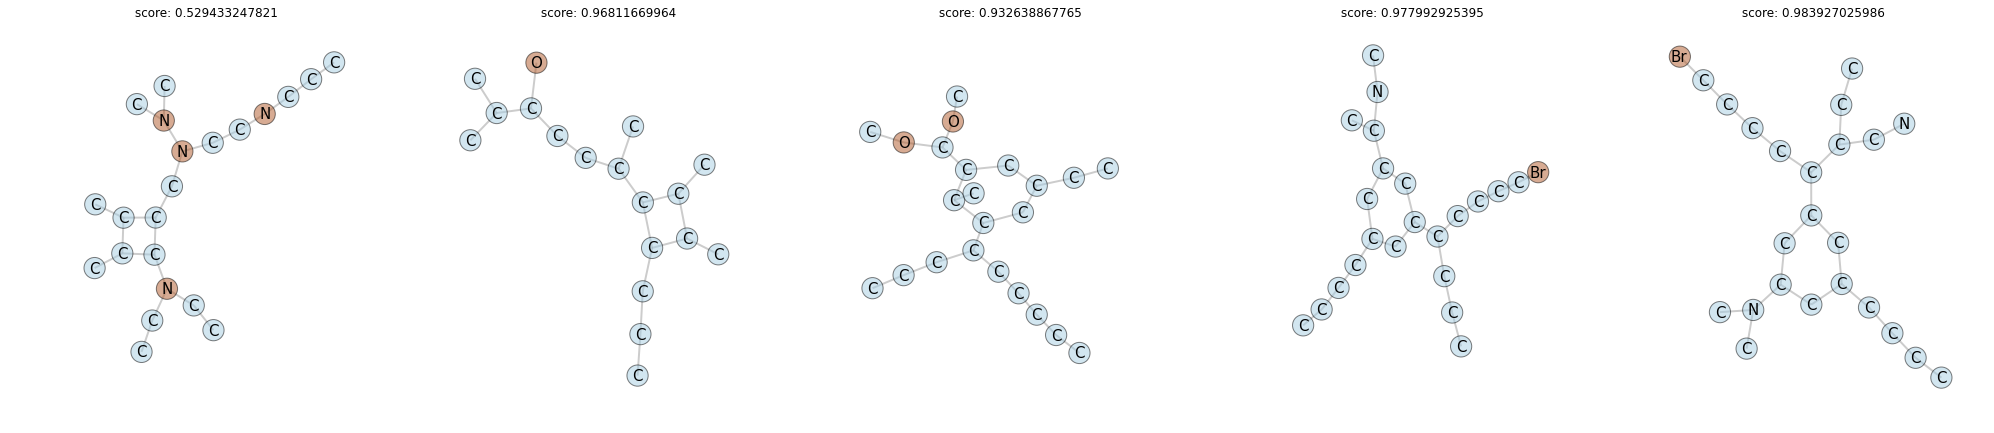

_propose_graph delivers... iteration 0 ; core 4 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 1 ; core 15 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 2 ; core 2 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 3 ; core 4 of 17 ; original_cips tried  1
_propose_graph delivers... iteration 4 ; core 0 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 5 ; core 0 of 1 ; original_cips tried  0
_propose_graph delivers... iteration 6 ; core 0 of 6 ; original_cips tried  0
_propose_graph delivers... iteration 7 ; core 7 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 8 ; core 0 of 4 ; original_cips tried  0
_propose_graph delivers... iteration 9 ; core 0 of 5 ; original_cips tried  0
_propose_graph delivers... iteration 10 ; core 0 of 27 ; original_cips tried  0
_propose_graph delivers... iteration 11 ; core 0 of 4 ; original_cips tried  0
_propose_graph delivers... iteration 12 ; core 15 of 1

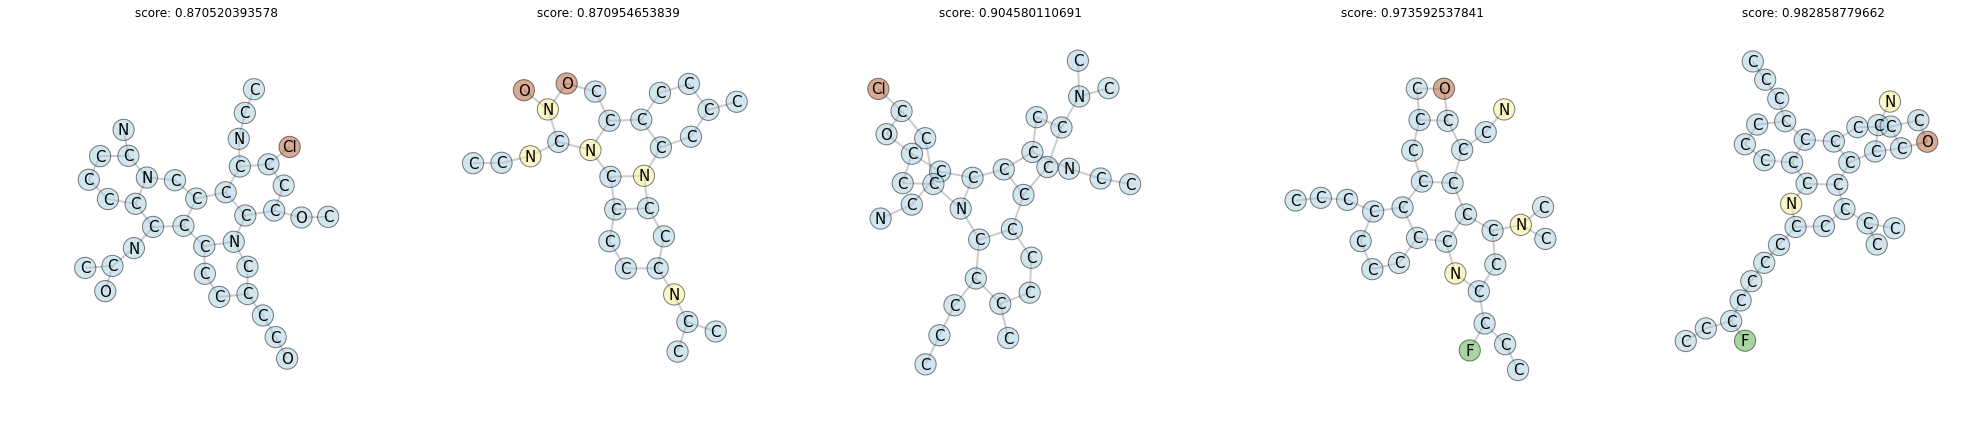

_propose_graph delivers... iteration 0 ; core 0 of 27 ; original_cips tried  0
_propose_graph delivers... iteration 1 ; core 0 of 6 ; original_cips tried  0
_propose_graph delivers... iteration 2 ; core 0 of 25 ; original_cips tried  0
_propose_graph delivers... iteration 3 ; core 0 of 2 ; original_cips tried  0
_propose_graph delivers... iteration 4 ; core 0 of 2 ; original_cips tried  0
_propose_graph delivers... iteration 5 ; core 0 of 25 ; original_cips tried  0
_propose_graph delivers... iteration 6 ; core 0 of 1 ; original_cips tried  0
_propose_graph delivers... iteration 7 ; core 0 of 2 ; original_cips tried  0
_propose_graph delivers... iteration 8 ; core 0 of 25 ; original_cips tried  0
_propose_graph delivers... iteration 9 ; core 0 of 8 ; original_cips tried  0
_propose_graph delivers... iteration 10 ; core 0 of 22 ; original_cips tried  0
_propose_graph delivers... iteration 11 ; core 0 of 22 ; original_cips tried  0
_propose_graph delivers... iteration 12 ; core 0 of 25 ;

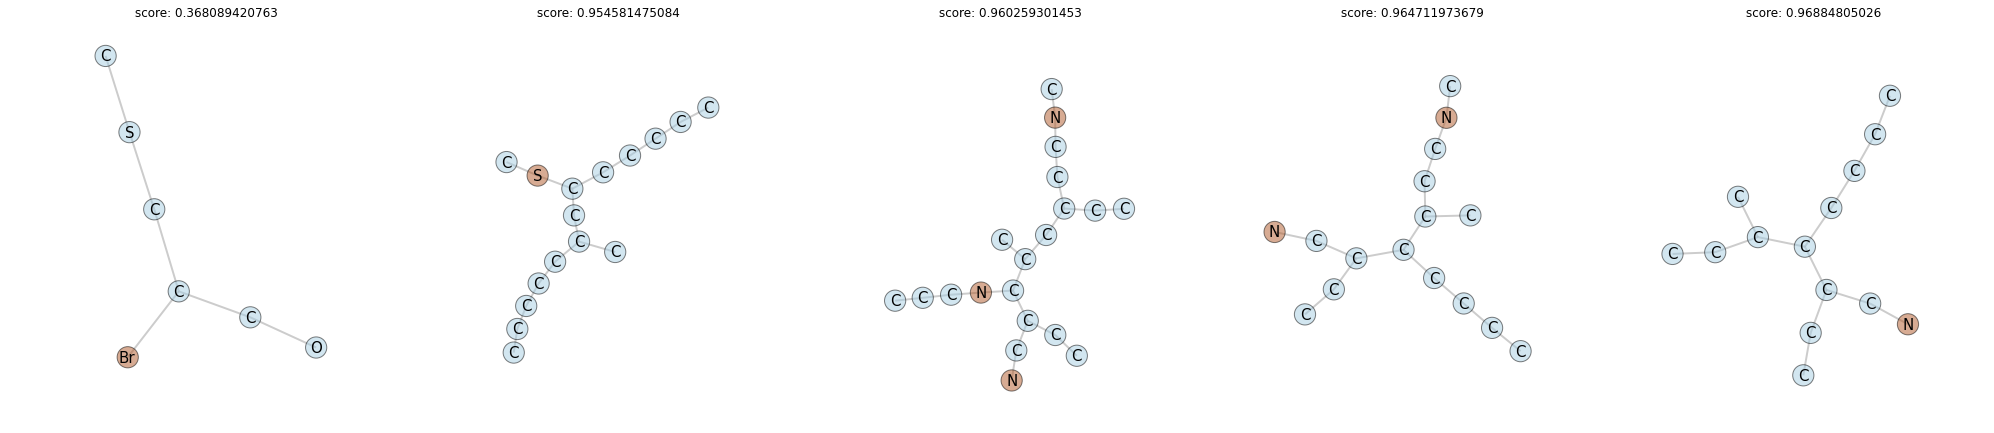

_propose_graph delivers... iteration 0 ; core 0 of 6 ; original_cips tried  0
_propose_graph delivers... iteration 1 ; core 0 of 10 ; original_cips tried  0
_propose_graph delivers... iteration 2 ; core 0 of 8 ; original_cips tried  0
_propose_graph delivers... iteration 3 ; core 0 of 1 ; original_cips tried  0
_propose_graph delivers... iteration 4 ; core 0 of 25 ; original_cips tried  0
_propose_graph delivers... iteration 5 ; core 0 of 3 ; original_cips tried  0
_propose_graph delivers... iteration 6 ; core 0 of 8 ; original_cips tried  0
_propose_graph delivers... iteration 7 ; core 0 of 8 ; original_cips tried  0
_propose_graph delivers... iteration 8 ; core 0 of 8 ; original_cips tried  0
_propose_graph delivers... iteration 9 ; core 0 of 8 ; original_cips tried  0
_propose_graph delivers... iteration 10 ; core 0 of 25 ; original_cips tried  0
_propose_graph delivers... iteration 11 ; core 0 of 25 ; original_cips tried  0
_propose_graph delivers... iteration 12 ; core 0 of 25 ; o

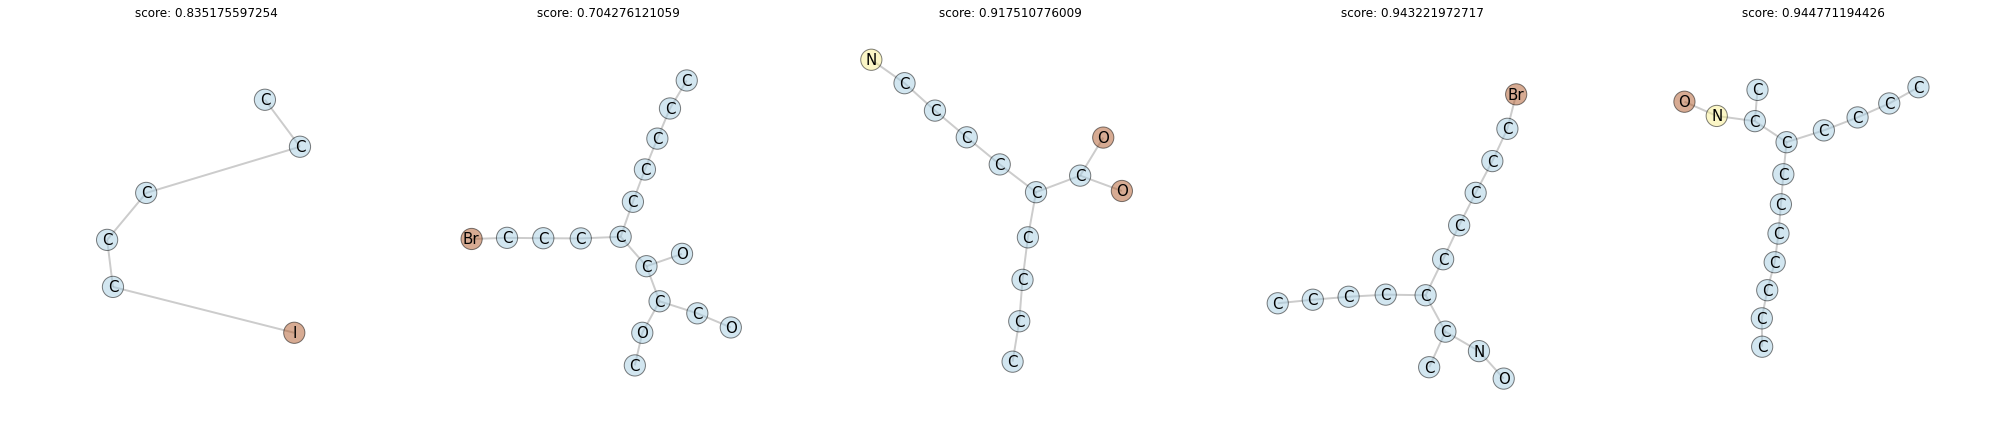

_propose_graph delivers... iteration 0 ; core 0 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 1 ; core 0 of 4 ; original_cips tried  0
_propose_graph delivers... iteration 2 ; core 0 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 3 ; core 1 of 10 ; original_cips tried  0
_propose_graph delivers... iteration 4 ; core 0 of 22 ; original_cips tried  0
_propose_graph delivers... iteration 5 ; core 0 of 3 ; original_cips tried  0
_propose_graph delivers... iteration 6 ; core 0 of 27 ; original_cips tried  0
_propose_graph delivers... iteration 7 ; core 0 of 25 ; original_cips tried  0
_propose_graph delivers... iteration 8 ; core 0 of 22 ; original_cips tried  0
_propose_graph delivers... iteration 9 ; core 1 of 22 ; original_cips tried  0
_propose_graph delivers... iteration 10 ; core 0 of 22 ; original_cips tried  0
_propose_graph delivers... iteration 11 ; core 0 of 22 ; original_cips tried  0
_propose_graph delivers... iteration 12 ; core 0 of 

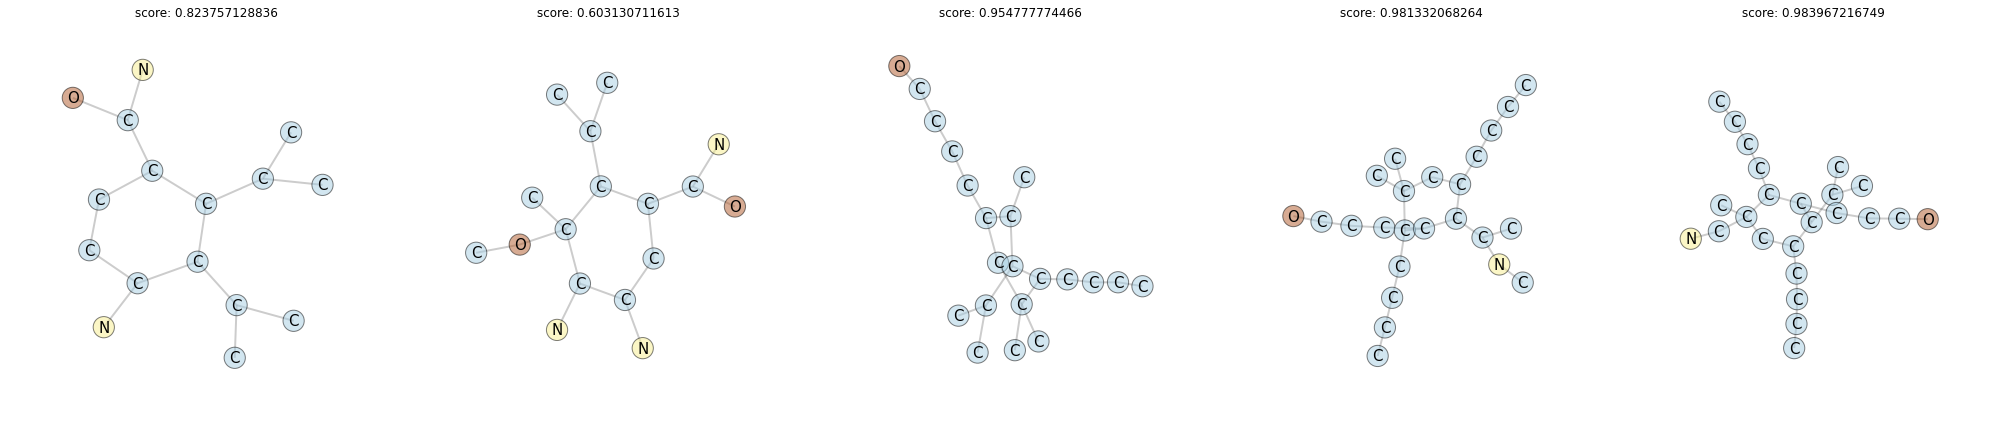

_propose_graph delivers... iteration 0 ; core 0 of 1 ; original_cips tried  0
_propose_graph delivers... iteration 1 ; core 2 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 2 ; core 0 of 27 ; original_cips tried  0
_propose_graph delivers... iteration 3 ; core 0 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 4 ; core 5 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 5 ; core 1 of 17 ; original_cips tried  0
_propose_graph delivers... iteration 6 ; core 0 of 2 ; original_cips tried  0
_propose_graph delivers... iteration 7 ; core 1 of 9 ; original_cips tried  0
_propose_graph delivers... iteration 8 ; core 0 of 22 ; original_cips tried  0
_propose_graph delivers... iteration 9 ; core 0 of 4 ; original_cips tried  0
_propose_graph delivers... iteration 10 ; core 0 of 1 ; original_cips tried  0
_propose_graph delivers... iteration 11 ; core 1 of 27 ; original_cips tried  0
_propose_graph delivers... iteration 12 ; core 1 of 17 

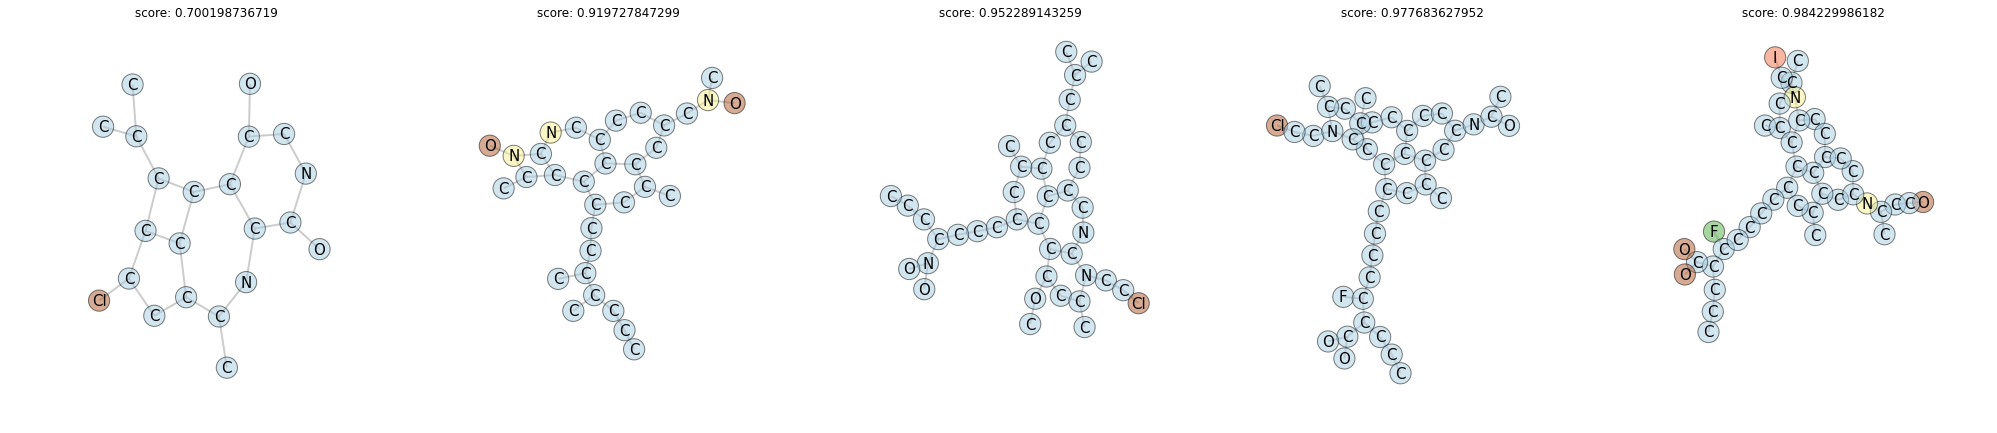

CPU times: user 1min 15s, sys: 912 ms, total: 1min 16s
Wall time: 1min 17s


In [5]:
%%time
# plot examples of sampling paths
from graphlearn.utils.draw import  graphlearn_draw, get_score_of_graph
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    graphlearn_draw(path_graphs,
                   n_graphs_per_line=6, size=7, 
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, edge_alpha=0.2, node_size=450,
                   headlinehook=get_score_of_graph)

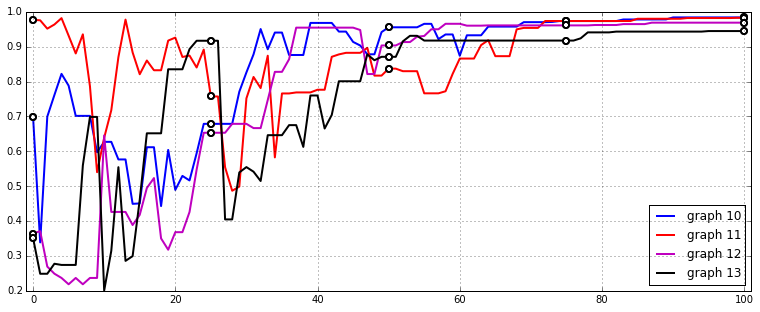

CPU times: user 284 ms, sys: 24 ms, total: 308 ms
Wall time: 302 ms


In [6]:
%%time
# plot sampling path score
from itertools import islice
import numpy as np
import pylab as plt
markevery=n_steps/(n_samples-1)
step=1
num_graphs_per_plot=4
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(13,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, linewidth=2, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
        plt.plot(data, linestyle='None',markevery=markevery, markerfacecolor='white', marker='o', markeredgewidth=2,markersize=6)
    plt.legend(loc='lower right')
    plt.grid()
    plt.xlim(-1,n_steps+1)
    #plt.ylim(-0.1,1.1)
    plt.show()

.